<a href="https://colab.research.google.com/github/lemonyun/keras_study/blob/main/3_5_classifying_newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단일 레이블 다중 분류 문제


In [1]:
import keras
keras.__version__


'2.7.0'

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [4]:
len(test_data)

2246

In [3]:
len(train_data)

8982

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_labels[10]

3

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [11]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

기존의 16차원 중간층은 46개의 클래스를 구분하기에 제약이 많을것 같으므로 64개로 크기를 늘림

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

시그모이드와 소프트맥스의 차이

시그모이드는 이진 분류를 할 때 사용 0에서 1사이의 값을 출력하므로 0.5를 기준으로 2개의 클래스로 분류할 수 있음

소프트맥스도 각 클래스의 확률을 출력하는데 모든 확률의 합은 1이다.

categorical_crossentropy 손실함수는 모델이 출력한 확률 분포와 타깃 분포 사이의 거리를 최소화한다.




In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 64ms/step - loss: 2.5780 - accuracy: 0.5155 - val_loss: 1.7711 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.4621 - accuracy: 0.6983 - val_loss: 1.3319 - val_accuracy: 0.7010
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.0858 - accuracy: 0.7591 - val_loss: 1.1479 - val_accuracy: 0.7440
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8492 - accuracy: 0.8133 - val_loss: 1.0301 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6626 - accuracy: 0.8622 - val_loss: 0.9531 - val_accuracy: 0.8040
Epoch 6/20
16/16 [==============================] - 1s 51ms/step - loss: 0.5236 - accuracy: 0.8938 - val_loss: 0.9035 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 0.4137 - accuracy: 0.9163 - val_loss: 0.8833 - val_accuracy: 0.8170
Epoch 8/20
16

In [16]:
import matplotlib.pyplot as plt

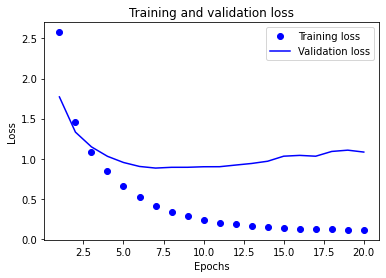

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

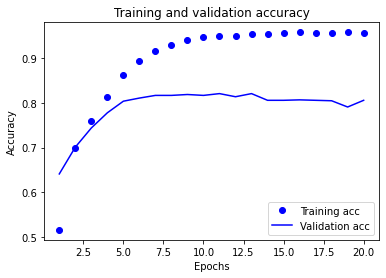

In [19]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 62ms/step - loss: 2.4843 - accuracy: 0.4660 - val_loss: 1.6464 - val_accuracy: 0.6500
Epoch 2/9
16/16 [==============================] - 1s 49ms/step - loss: 1.3613 - accuracy: 0.7097 - val_loss: 1.2782 - val_accuracy: 0.7110
Epoch 3/9
16/16 [==============================] - 1s 50ms/step - loss: 1.0348 - accuracy: 0.7765 - val_loss: 1.1619 - val_accuracy: 0.7460
Epoch 4/9
16/16 [==============================] - 1s 49ms/step - loss: 0.8326 - accuracy: 0.8200 - val_loss: 1.0277 - val_accuracy: 0.7850
Epoch 5/9
16/16 [==============================] - 1s 48ms/step - loss: 0.6701 - accuracy: 0.8523 - val_loss: 0.9622 - val_accuracy: 0.8010
Epoch 6/9
16/16 [==============================] - 1s 47ms/step - loss: 0.5418 - accuracy: 0.8829 - val_loss: 0.9344 - val_accuracy: 0.8070
Epoch 7/9
16/16 [==============================] - 1s 49ms/step - loss: 0.4355 - accuracy: 0.9107 - val_loss: 0.8996 - val_accuracy: 0.8080
Epoch 8/9
16/16 [===

[테스트 손실값, 테스트 정확도]

In [21]:
results

[0.9936301708221436, 0.7938557267189026]

랜덤으로 찍었을때 확률이 18프로

In [22]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.1803205699020481

레이블을 정수 인코딩으로 하는 경우
손실함수는 sparse_categorical_crossentropy가 됨